# PCA and TSNE Analysis
### Allison Glynn
### April 6 2024

PCA and TSNE analyses of pooled dataset

In [32]:
import sklearn as sk
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
# load in data:
df = pd.read_csv('../Data/20440_cleaned_data.csv')
data = df.drop(['Diagnosis'], axis=1) # data without dimension column

# make a list of diagnoses:
diagnosis = df["Diagnosis"]

## PCA of pooled dataset

**Now we perform PCA:**

In [82]:
# prep PCA output dataframe:
columns_list = []
for i in range(11):
    columns_list.append("PC" + str(i + 1))

**Run PCA:**

In [52]:
pca = PCA(n_components=.95)
out = pca.fit_transform(data)
out_df = pd.DataFrame(out, columns=columns_list)

**Visualize variance ratio explained by each component:**

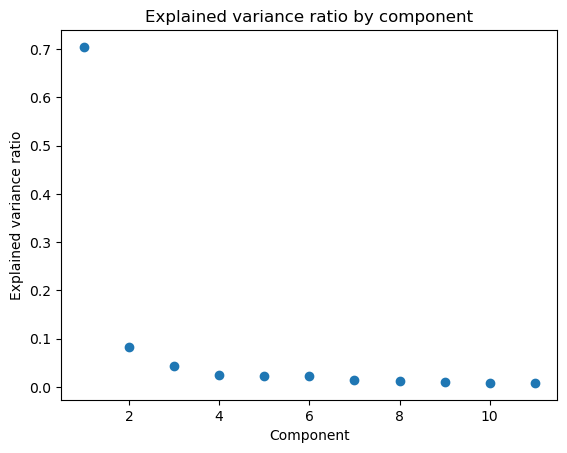

In [81]:
pc = np.linspace(1, 11, 11)
var_ratio = pca.explained_variance_ratio_
plt.scatter(pc, var_ratio)
plt.title('Explained variance ratio by component')
plt.xlabel('Component')
plt.ylabel('Explained variance ratio');

**Visualize clustering by diagnosis with first two PCs:**

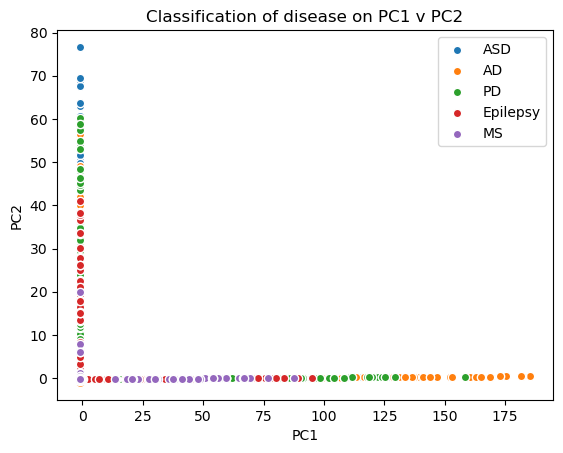

In [92]:
pcs = pca.components_

# set up lists of diagnosis indices:
ASD = []
AD = []
PD = []
Epilepsy = []
MS = []

# indicate which sample indices are which disease:
for i in range(len(diagnosis)):
    if diagnosis[i]=='ASD':
        ASD.append(i)
    if diagnosis[i]=='AD':
        AD.append(i)
    if diagnosis[i]=='PD':
        PD.append(i)
    if diagnosis[i]=='Epilepsy':
        Epilepsy.append(i)
    if diagnosis[i]=='MS':
        MS.append(i)

# plot PC1 v PC2, indicating which indices of these are which disease:
plt.scatter(out_df['PC1'][ASD], out_df['PC2'][ASD], label='ASD', edgecolor='white')
plt.scatter(out_df['PC1'][AD], out_df['PC2'][AD], label='AD', edgecolor='white')
plt.scatter(out_df['PC1'][PD], out_df['PC2'][PD], label='PD', edgecolor='white')
plt.scatter(out_df['PC1'][Epilepsy], out_df['PC2'][Epilepsy], label='Epilepsy', edgecolor='white')
plt.scatter(out_df['PC1'][MS], out_df['PC2'][MS], label='MS', edgecolor='white')


plt.legend();
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Classification of disease on PC1 v PC2");
plt.savefig('../Figures/PCA_plot.svg')

## TSNE Analysis

**Run TSNE**

This will be done on the already reduced dimension dataset produced by PCA:

In [83]:
# run TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto', 
                  init='random', perplexity=25).fit_transform(out_df)

In [85]:
# Create dataframe with output (component 1 is 0, component 2 is 1):
TSNE_df = pd.DataFrame(X_embedded)

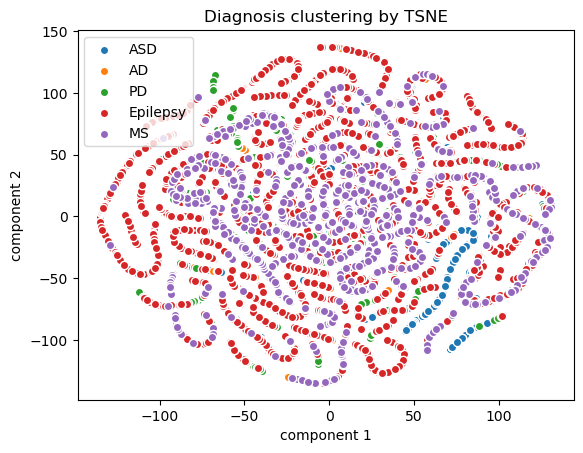

In [91]:
# set up lists of diagnoses indices:
ASD = []
AD = []
PD = []
Epilepsy = []
MS = []

# indicate which sample indices are which diagnoses:
for i in range(len(diagnosis)):
    if diagnosis[i]=='ASD':
        ASD.append(i)
    if diagnosis[i]=='AD':
        AD.append(i)
    if diagnosis[i]=='PD':
        PD.append(i)
    if diagnosis[i]=='Epilepsy':
        Epilepsy.append(i)
    if diagnosis[i]=='MS':
        MS.append(i)

# plot component 1 v component 2, indicating which indices are which diagnosis:
plt.scatter(TSNE_df[0][ASD], TSNE_df[1][ASD], label='ASD', edgecolor='white')
plt.scatter(TSNE_df[0][AD], TSNE_df[1][AD], label='AD', edgecolor='white')
plt.scatter(TSNE_df[0][PD], TSNE_df[1][PD], label='PD', edgecolor='white')
plt.scatter(TSNE_df[0][Epilepsy], TSNE_df[1][Epilepsy], label='Epilepsy', edgecolor='white')
plt.scatter(TSNE_df[0][MS], TSNE_df[1][MS], label='MS', edgecolor='white')


plt.legend();
plt.xlabel("component 1")
plt.ylabel("component 2")
plt.title("Diagnosis clustering by TSNE");
plt.savefig('../Figures/TSNE_plot.svg')